Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 


Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Importing libraries

In [1144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Load Data

In [1145]:
# Reading the dataset
df = pd.read_csv('train.csv')


### 3. Understanding the data

In [1146]:
df.shape

(1460, 81)

In [1147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1148]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## 
We could see that there are some features with a lot of missing values. Lets do data cleaning

### 4. Missing value Analysis

In [1149]:
# get_missing_count function passing input of df and percent count its value counts

def get_missing_count(dataframe, percent_count):
    null_df = pd.DataFrame(round(100 * (dataframe.isnull().sum() / len(dataframe)), 2).sort_values(ascending = False), columns=['Null_Percentage'])
    null_df.index.name = 'Features'
    null_df = null_df[null_df['Null_Percentage'] > percent_count]
    return null_df

In [1150]:
# Checking missing count greater than 0, > 30 for better modeling
null_df = get_missing_count(df, 30)
null_df

,Null_Percentage
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26


### 5. Drop missing value columns which is high in percentage

In [1151]:
# Above 30% of the missing values, drop those columns as they may not contribute well to the model
df.drop(columns=null_df.index, inplace=True)

In [1152]:
# Check missing count greater than 0, > 0 and fix the missing values
null_df = get_missing_count(df, 0)
null_df

,Null_Percentage
Features,
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtFinType1,2.53


### 6. Treating Missing Values


In [1153]:

# Considering categorical columns where NaN means feature not available and mark it as none
none_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',]

# Fill categorical "Not Available" with 'None'
for col in none_cols:
    df[col] = df[col].fillna('None')

# Garage year: NaN means no garage
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# Numerical columns where NaN is actual missing data
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [1154]:
# Re checking missing count greater than 0, > 0
null_df = get_missing_count(df, 0)
null_df

,Null_Percentage
Features,


### 7. Map Variables

In [1155]:
# Quality mapping of scal 0 to 5
overall_map = {
    10:'Very Excellent',
    9:'Excellent',
    8:'Very Good',
    7:'Good',
    6:'Above Average',
    5:'Average',
    4:'Below Average',
    3:'Fair',
    2:'Poor',
    1:'Very Poor'
}

ordinal_overall_cols = [
    'OverallQual', 'OverallCond'
]

for col in ordinal_overall_cols:
    df[col] = df[col].map(overall_map)


In [1156]:
# Converting some numerical columns to categorical as they are referring to categories
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')

In [1157]:
# drop identifier as its a unique value for each row
df.drop('Id', axis=1, inplace=True)

### 8. Exploratory Data Analysis

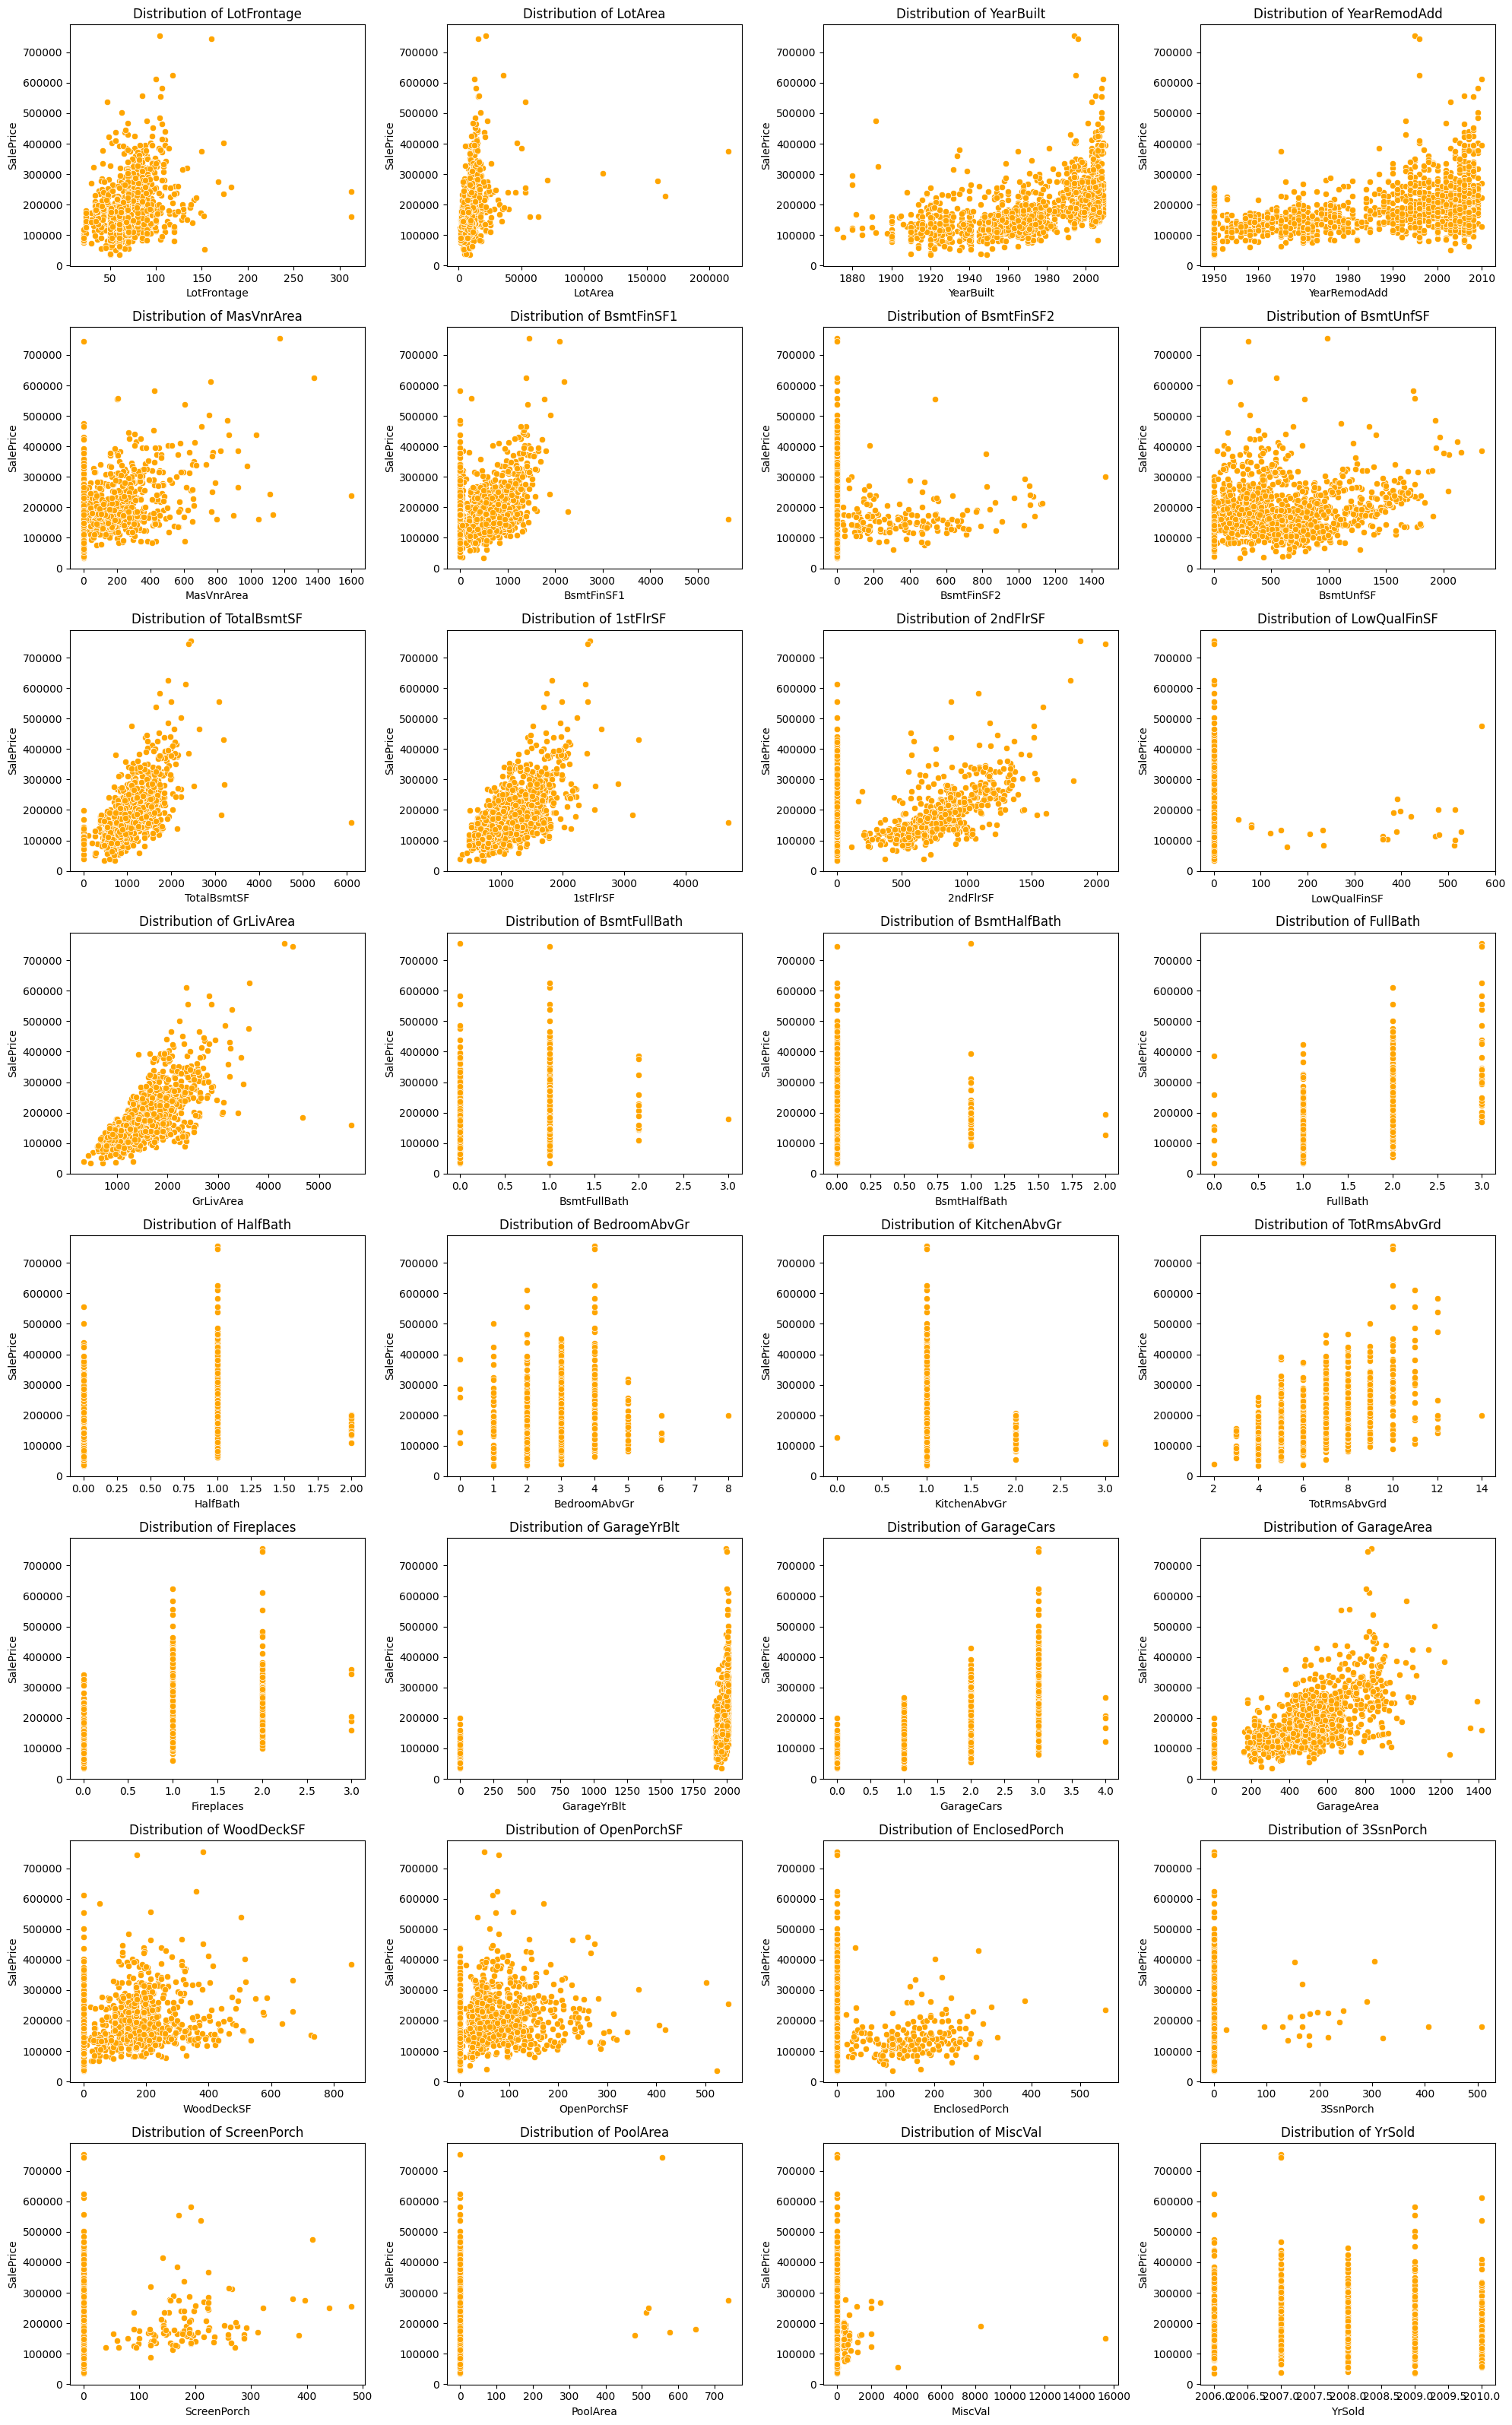

In [1158]:
# box plot to show the distribution of all numerical variables as a subplots
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')
import math

n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df[col], y=df['SalePrice'], color='orange')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [1159]:
# Based on scatter plot analysis, a few variables were identified with outliers are removed to improve model stability.
df = df[df['LotFrontage'] < 250]
df = df[df['LotArea'] < 150000]
df = df[df['MasVnrArea'] < 1400]
df = df[df['BsmtFinSF1'] < 3000]
df = df[df['GrLivArea'] < 4500]
df = df[df['TotalBsmtSF'] < 5000]
df = df[df['1stFlrSF'] < 4000]


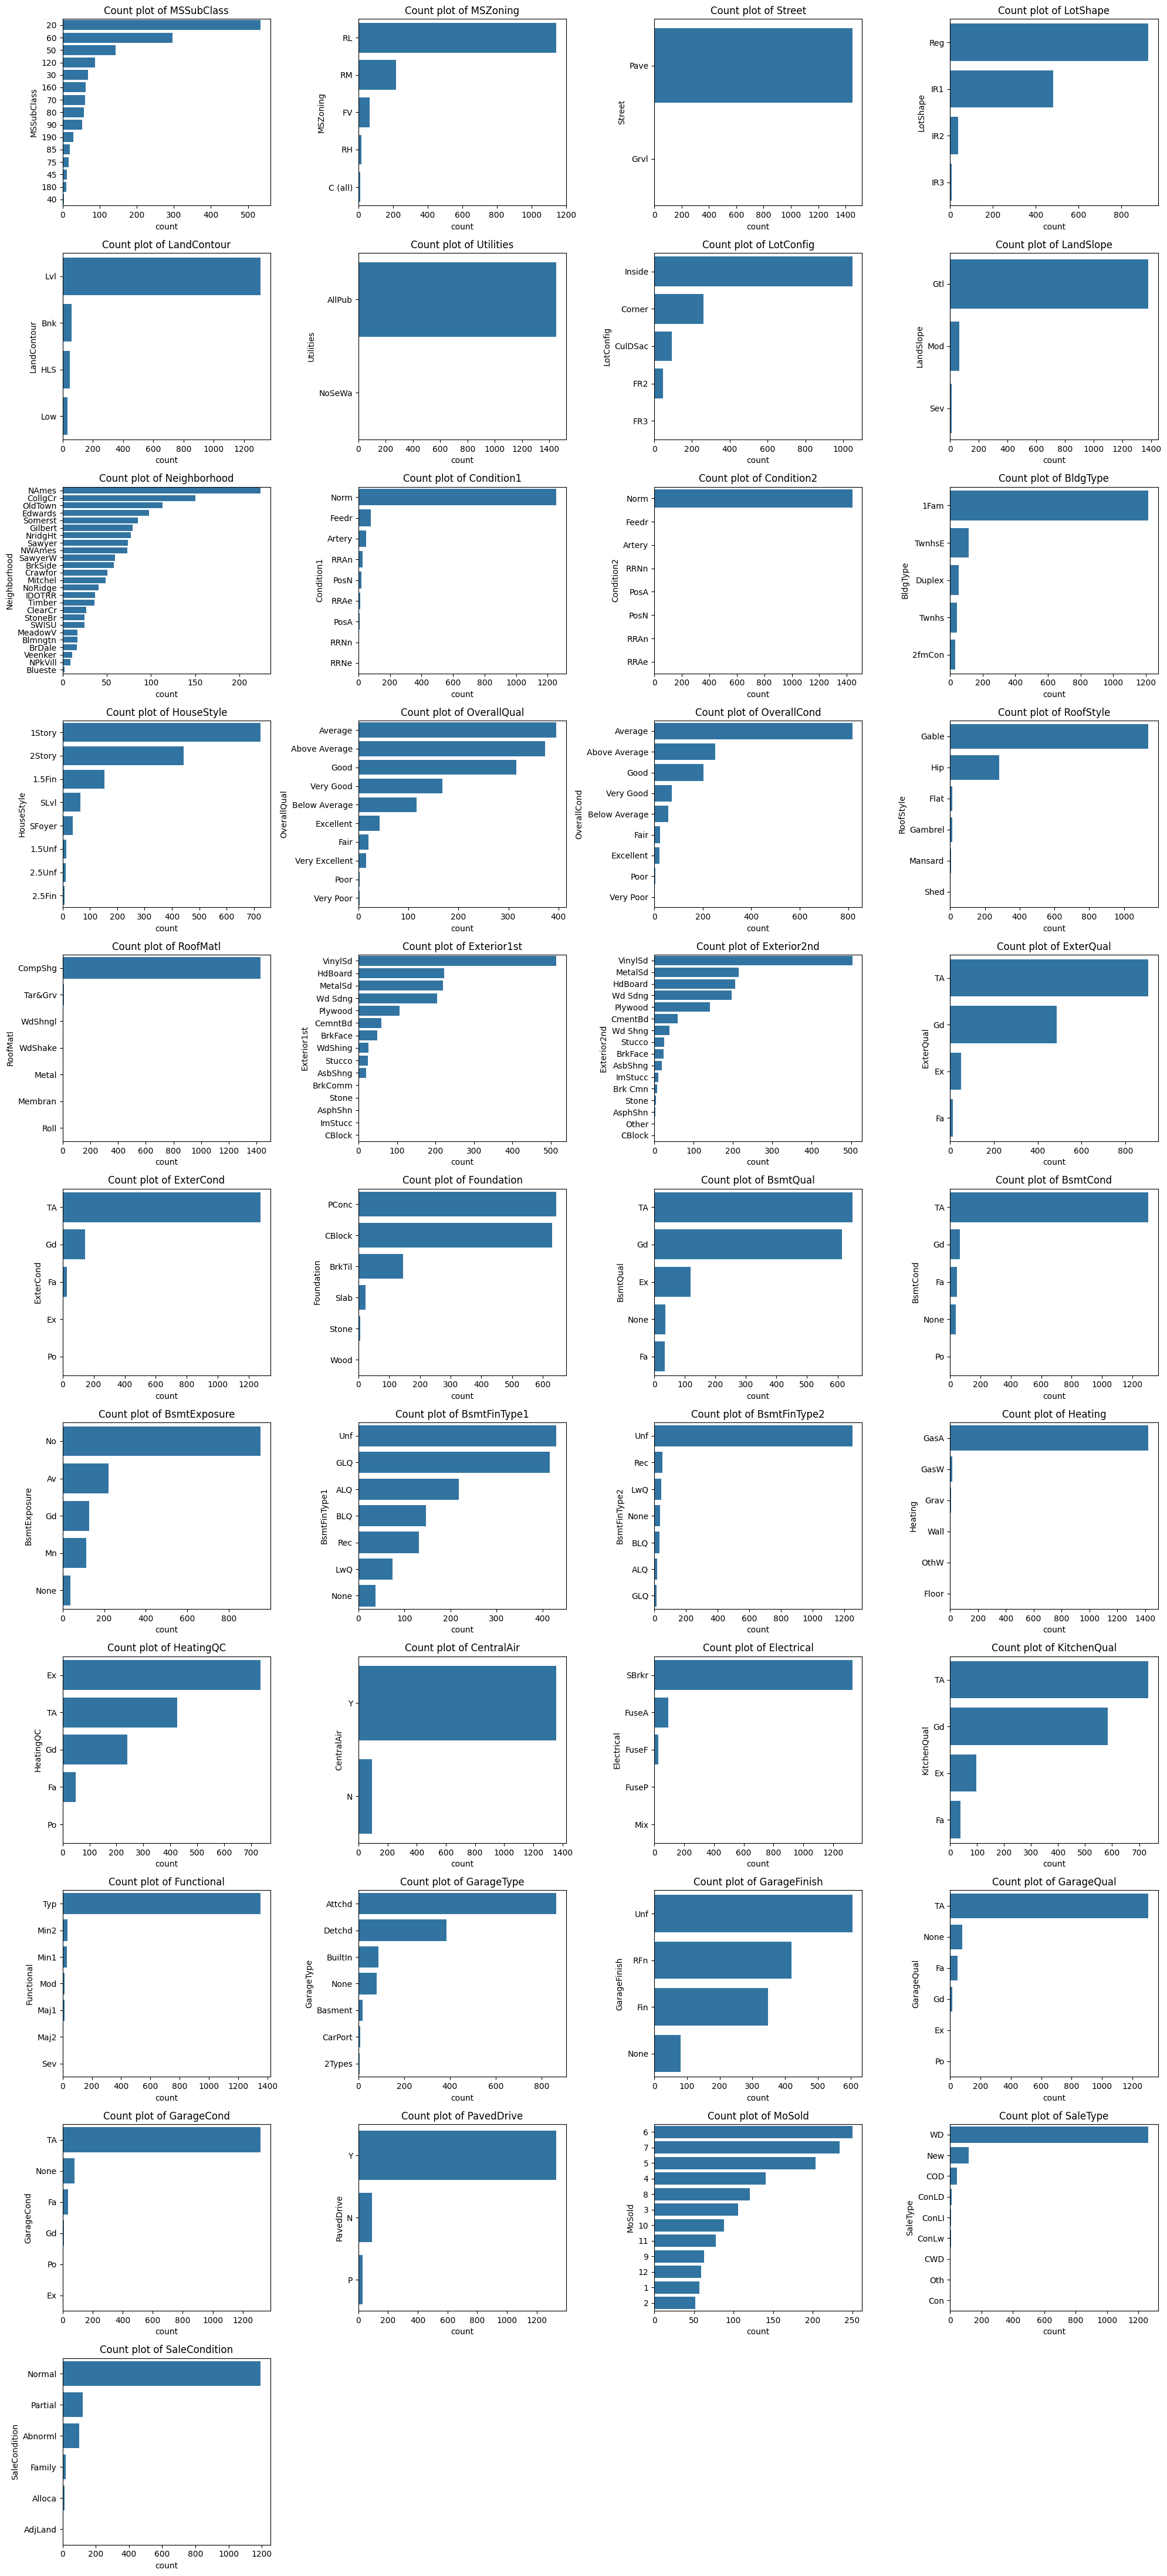

In [1160]:
# plot for categorical variables using count plots 
cat_cols = df.select_dtypes(include=['object']).columns
n_cols = 4
n_rows = math.ceil(len(cat_cols) / n_cols)
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

In [1161]:
# Droping catogorical columns having solid single values which wont add any value to the model
df.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'], inplace=True)

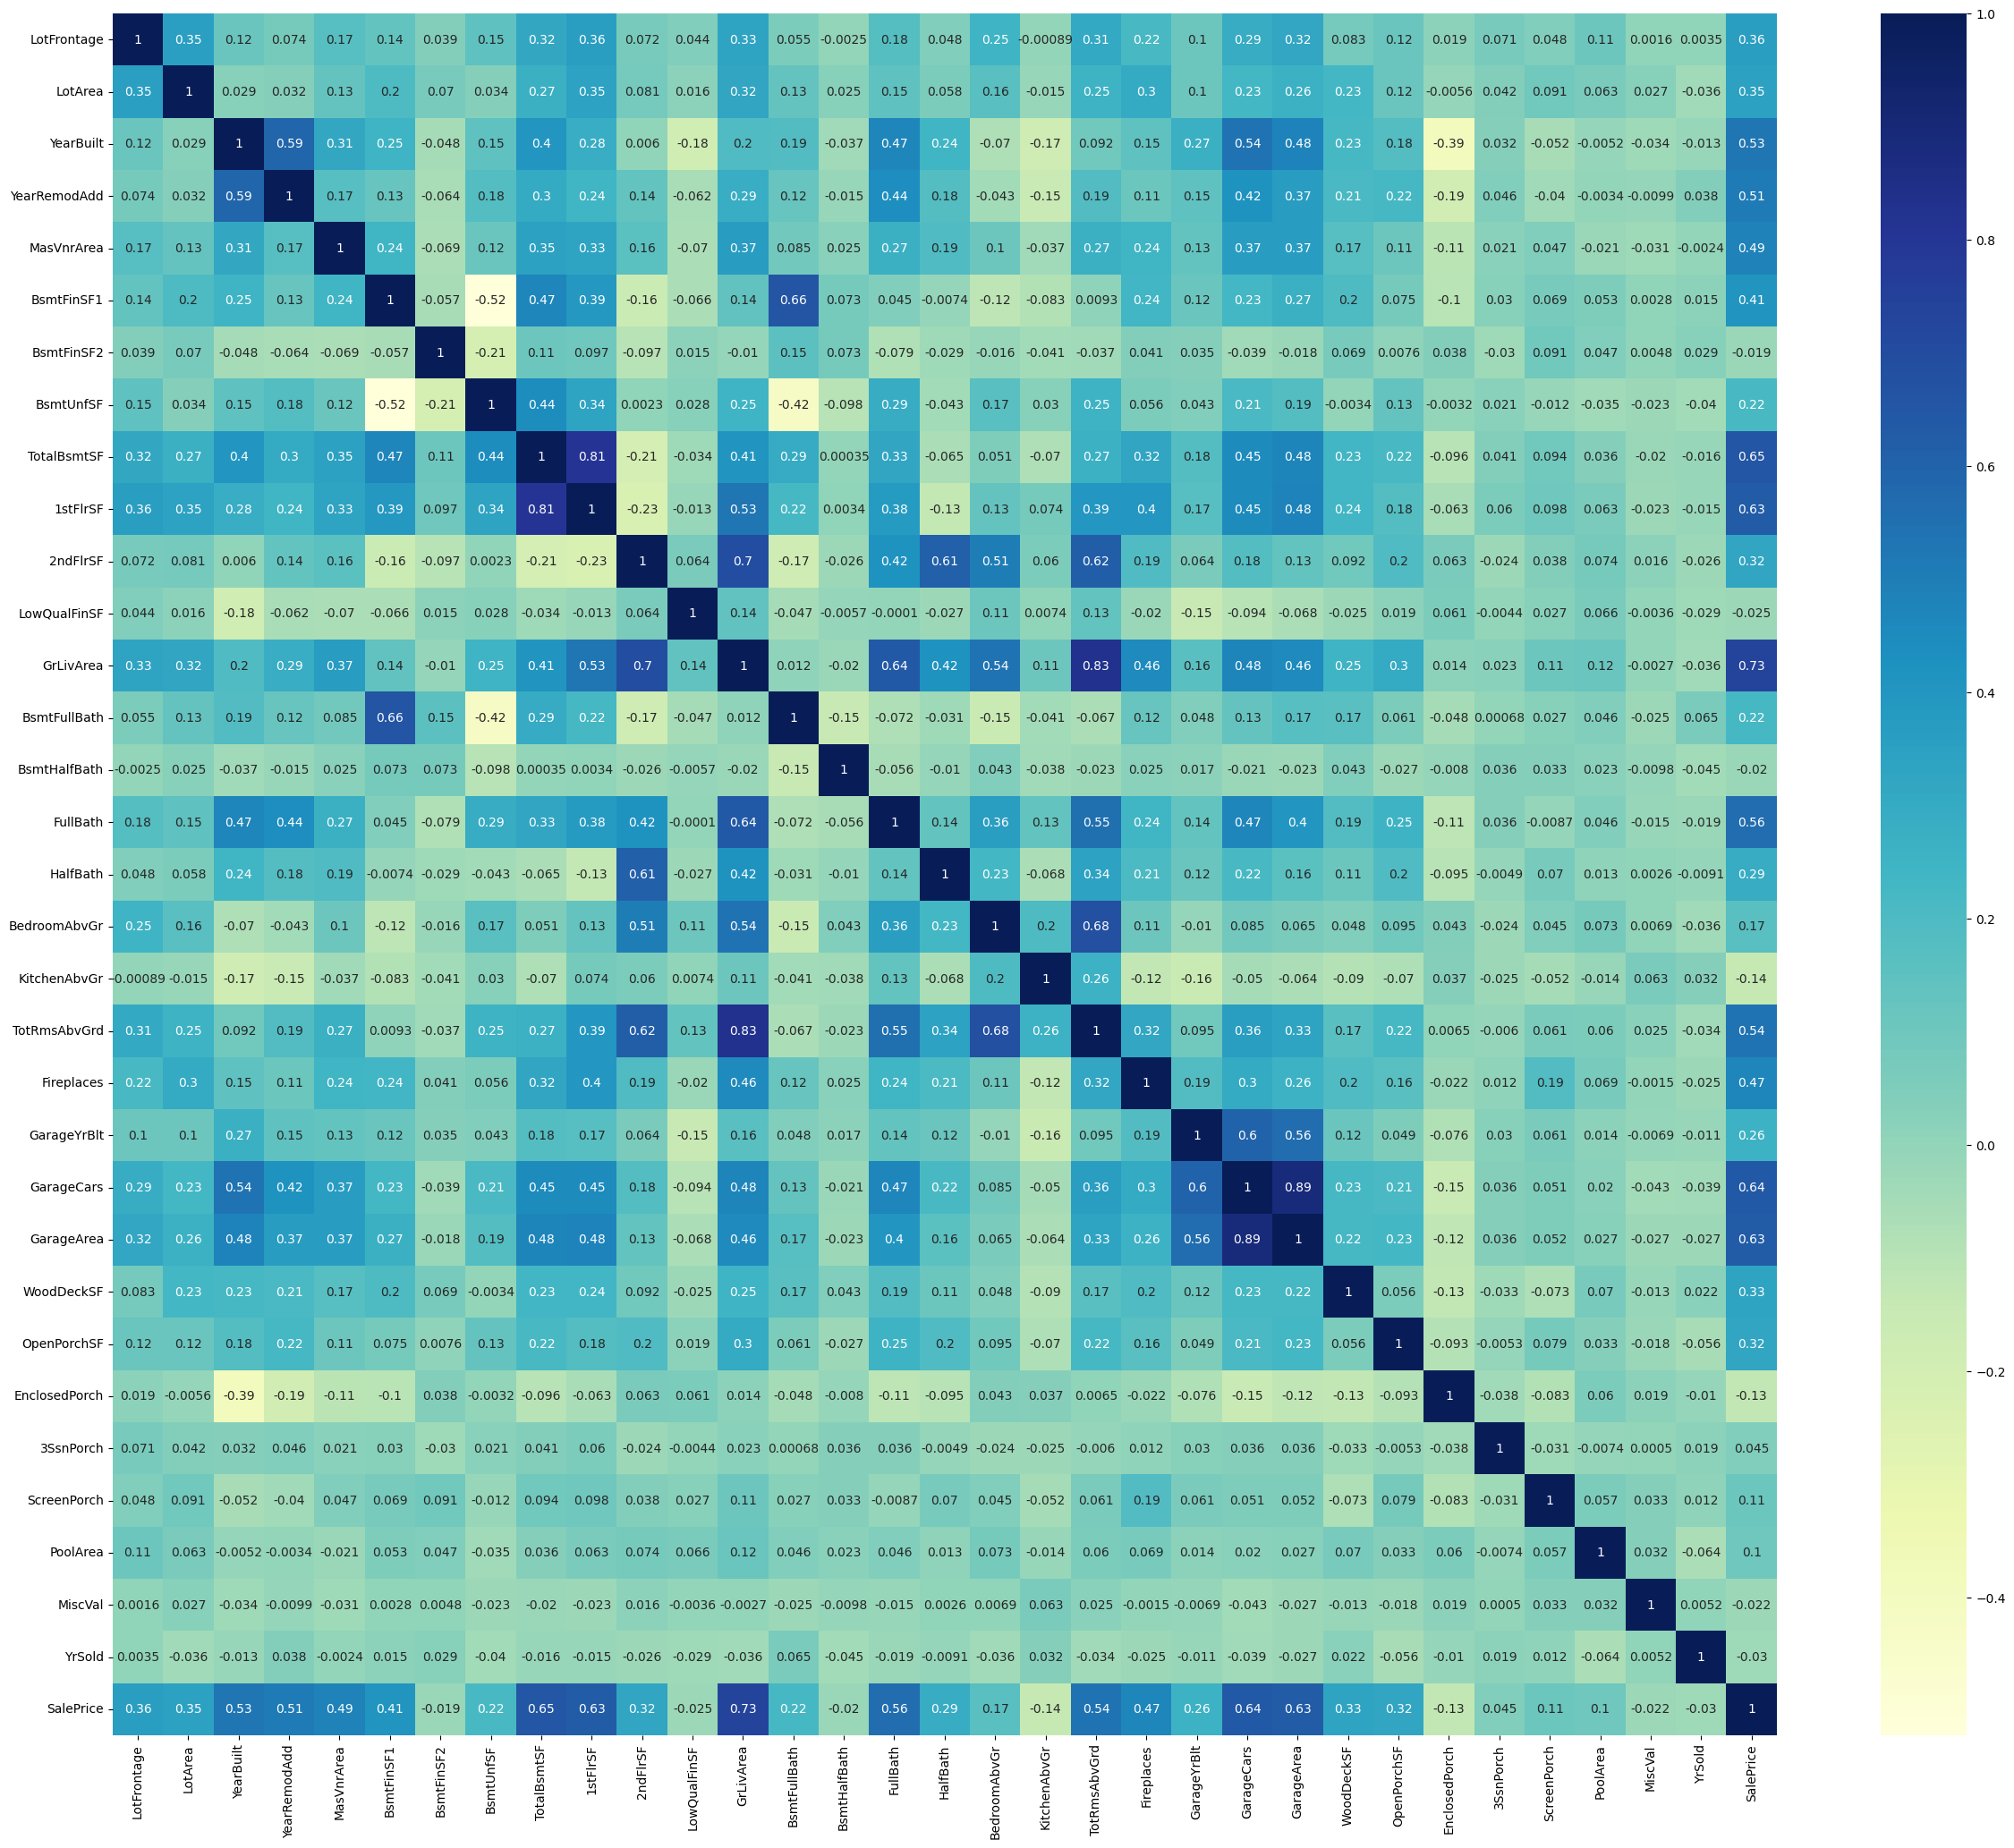

In [1162]:
# plot heatmap for numeric columns 
plt.figure(figsize=(30, 25))
sns.heatmap(data=df.select_dtypes(include=[np.number]).corr(), cmap='YlGnBu', annot=True)
plt.show()

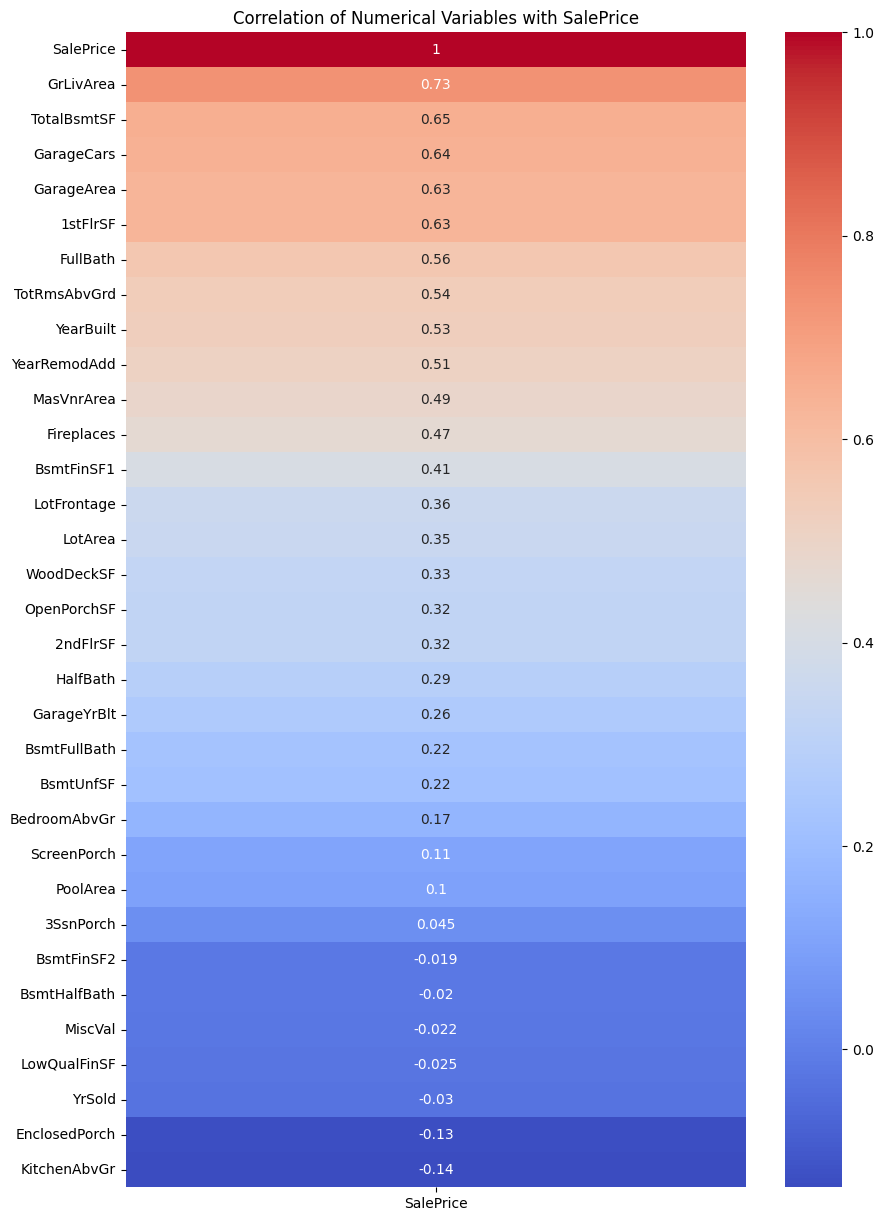

In [1163]:
# Sort by SalePrice correlation for better visibility
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_cols].corr()
saleprice_corr = corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(10,15))
sns.heatmap(saleprice_corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Numerical Variables with SalePrice")
plt.show()

### We can visually see the strong correlations of the features

### 9. Log Transformation

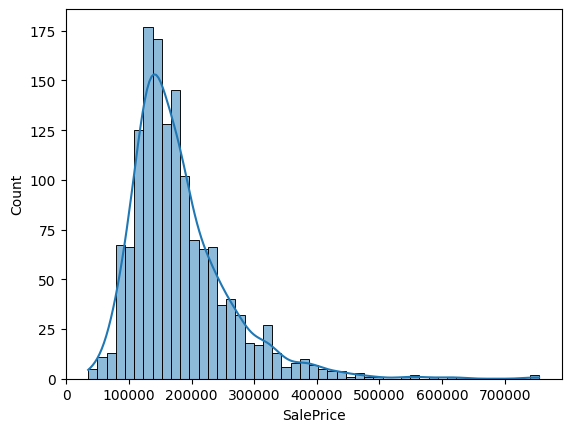

np.float64(1.8953529142323342)

In [1164]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()
df['SalePrice'].skew()

### Observation: The histogram is right skewed long tail on the higher price side skew value is positive and high

In [1165]:
# Apply log transformation to SalePrice to reduce skewness, improves model stability to improvise Ridge/Lasso performance
df['SalePrice'] = np.log1p(df['SalePrice'])

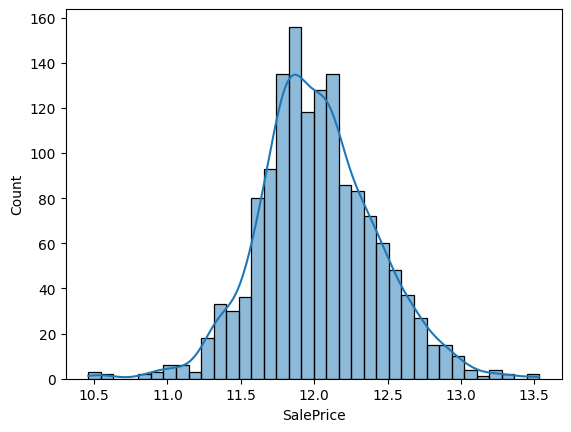

np.float64(0.126047815555159)

In [1166]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()
df['SalePrice'].skew()

### 10. Creation of Dummy Variables

In [1167]:
# Target variable
y = df['SalePrice']

# Drop target from predictors
X = df.drop('SalePrice', axis=1)


In [1168]:
cat_cols = X.select_dtypes(include=['object']).columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [1169]:
df.shape

(1453, 69)

In [1170]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [1171]:
X.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [1172]:
X.shape

(1453, 255)

In [1173]:
X.isnull().sum().sum()


np.int64(0)

### 11. Splitting the dataset into training and test set

In [1174]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1175]:

# Scaling to standardize features to ensure fair regularization in Ridge and Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [1176]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(1017, 255)
(436, 255)


In [1177]:
# Adding Helper /Utility functions for model training and evaluation
def regression_metrics(y_train, y_train_pred, y_test, y_test_pred):
    return {
        "R2_Train": r2_score(y_train, y_train_pred),
        "R2_Test": r2_score(y_test, y_test_pred),
        "RSS_Train": np.sum((y_train - y_train_pred) ** 2),
        "RSS_Test": np.sum((y_test - y_test_pred) ** 2),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }


### 11. Model Building & Evaluation

In [1178]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_train_pred = lr.predict(X_train_scaled)
lr_test_pred = lr.predict(X_test_scaled)

lr_metrics = regression_metrics(
    y_train, lr_train_pred,
    y_test, lr_test_pred
)
lr_metrics

{'R2_Train': 0.9490696081590482,
 'R2_Test': 0.9105160628239298,
 'RSS_Train': np.float64(8.276322450394947),
 'RSS_Test': np.float64(6.164212314698476),
 'RMSE_Train': np.float64(0.09021073574717237),
 'RMSE_Test': np.float64(0.11890374947501314)}

### 12. RFE for Reference

In [1179]:
rfe = RFE(estimator=lr, n_features_to_select=15)

rfe.fit(X_train_scaled, y_train)

rfe_top_features = X.columns[rfe.support_]
rfe_top_features

Index(['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'Fireplaces', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'OverallQual_Excellent', 'OverallQual_Very Good',
       'OverallCond_Average', 'OverallCond_Fair'],
      dtype='object')

### 13. Ridge Regression

In [1180]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {'alpha': np.logspace(-3, 3, 50)}

ridge = Ridge()

# Cross-validation folds
folds = 5

# GridSearchCV for Ridge Regression
ridge_model_cv = GridSearchCV(
    estimator=ridge,
    param_grid=params,
    scoring='r2',  
    cv=folds,
    return_train_score=True,
    verbose=1
)

# Fit on scaled data
ridge_model_cv.fit(X_train_scaled, y_train)

# Best alpha
print('Best Ridge alpha:', ridge_model_cv.best_params_['alpha'])

best_ridge = ridge_model_cv.best_estimator_

# Predictions
ridge_train_pred = best_ridge.predict(X_train_scaled)
ridge_test_pred = best_ridge.predict(X_test_scaled)

ridge_metrics = regression_metrics(
    y_train, ridge_train_pred,
    y_test, ridge_test_pred
)
ridge_metrics


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Ridge alpha: 184.20699693267164


{'R2_Train': 0.9397094147245562,
 'R2_Test': 0.9158518556526145,
 'RSS_Train': np.float64(9.797378469438474),
 'RSS_Test': np.float64(5.7966495889040015),
 'RMSE_Train': np.float64(0.09815094063697896),
 'RMSE_Test': np.float64(0.11530424044439441)}

In [1181]:
ridgeCV_results = pd.DataFrame(ridge_model_cv.cv_results_)

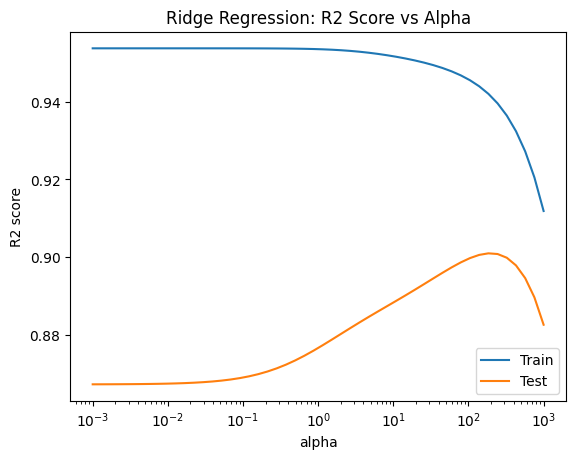

In [1182]:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label = 'Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label = 'Test')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.title('Ridge Regression: R2 Score vs Alpha')
plt.legend()
plt.show()

In [1183]:
# Use the best estimator from GridSearchCV (already fitted)
ridge_coef = pd.Series(ridge_model_cv.best_estimator_.coef_, index=X.columns)

# Select top 15 features based on absolute coefficient values
top_ridge = ridge_coef.abs().sort_values(ascending=False).head(15)

top_ridge


GrLivArea                0.044394
TotalBsmtSF              0.034809
1stFlrSF                 0.033900
BsmtFinSF1               0.025584
OverallQual_Very Good    0.024749
YearBuilt                0.024268
OverallQual_Excellent    0.023685
2ndFlrSF                 0.023397
OverallCond_Fair         0.022281
LotArea                  0.021464
FullBath                 0.020243
YearRemodAdd             0.019932
GarageArea               0.019192
Neighborhood_Crawfor     0.019144
Fireplaces               0.019099
dtype: float64

### 14. Lasso Regression

In [1184]:

params = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
              0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
              2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
              20, 50, 100]
}

lasso = Lasso(max_iter=5000)

# Cross-validation folds
folds = 5

# GridSearchCV for Lasso Regression
lasso_model_cv = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring='r2',
    cv=folds,
    return_train_score=True,
    verbose=1
)

# Fit on scaled data
lasso_model_cv.fit(X_train_scaled, y_train)

# Best alpha
print('Best Lasso alpha:', lasso_model_cv.best_params_['alpha'])


Fitting 5 folds for each of 26 candidates, totalling 130 fits
Best Lasso alpha: 0.001


In [1185]:
best_lasso = lasso_model_cv.best_estimator_

# Predictions
lasso_train_pred = best_lasso.predict(X_train_scaled)
lasso_test_pred = best_lasso.predict(X_test_scaled)

lasso_metrics = regression_metrics(
    y_train, lasso_train_pred,
    y_test, lasso_test_pred
)

lasso_metrics


{'R2_Train': 0.9429346560524606,
 'R2_Test': 0.9170241229295872,
 'RSS_Train': np.float64(9.273268282078513),
 'RSS_Test': np.float64(5.715896499434825),
 'RMSE_Train': np.float64(0.09548956957603091),
 'RMSE_Test': np.float64(0.11449827228609998)}

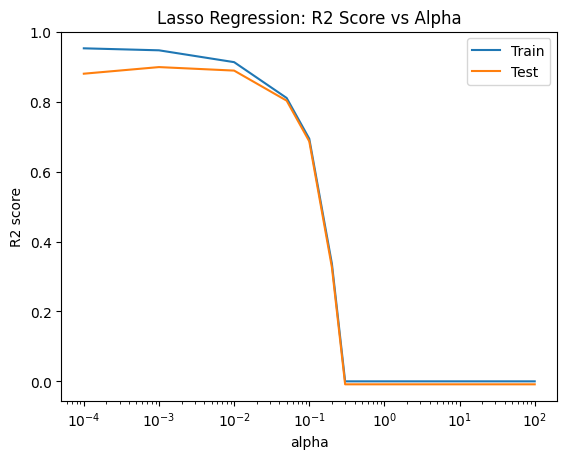

In [1186]:
# Convert GridSearchCV results to DataFrame
lassoCV_results = pd.DataFrame(lasso_model_cv.cv_results_)

# Plot Train and Test R² vs alpha
plt.plot(lassoCV_results['param_alpha'],
         lassoCV_results['mean_train_score'],
         label='Train')

plt.plot(lassoCV_results['param_alpha'],
         lassoCV_results['mean_test_score'],
         label='Test')

plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title('Lasso Regression: R2 Score vs Alpha')
plt.xscale('log')
plt.legend()
plt.show()


In [1187]:
import pandas as pd

lasso_coef = pd.Series(best_lasso.coef_, index=X.columns)

# Non-zero coefficients = selected features
lasso_selected_features = lasso_coef[lasso_coef != 0].sort_values(ascending=False)

print('Lasso selected features:')
lasso_selected_features.head(15)


Lasso selected features:


GrLivArea                     0.120111
YearBuilt                     0.065872
TotalBsmtSF                   0.047143
OverallQual_Very Good         0.030990
OverallQual_Excellent         0.028093
SaleCondition_Normal          0.025767
LotArea                       0.025642
Neighborhood_Crawfor          0.025167
BsmtFinSF1                    0.022256
SaleType_New                  0.021801
OverallQual_Very Excellent    0.020434
GarageCars                    0.020340
Functional_Typ                0.017616
YearRemodAdd                  0.017405
CentralAir_Y                  0.016453
dtype: float64

In [1188]:
results_df = pd.DataFrame.from_dict(
    {
        "Linear Regression": lr_metrics,
        "Ridge Regression": ridge_metrics,
        "Lasso Regression": lasso_metrics
    },
    orient="index"
)

results_df


,R2_Train,R2_Test,RSS_Train,RSS_Test,RMSE_Train,RMSE_Test
Linear Regression,0.949070,0.910516,8.276322,6.164212,0.090211,0.118904
Ridge Regression,0.939709,0.915852,9.797378,5.796650,0.098151,0.115304
Lasso Regression,0.942935,0.917024,9.273268,5.715896,0.095490,0.114498


## Conclusion
### 1. Which variables are significant in predicting the price of a house?
1. GrLivArea
2. YearBuilt
3. TotalBsmtSF
4. OverallQual_Very Good
5. OverallQual_Excellent
6. SaleCondition_Normal
7. LotArea
8. Neighborhood_Crawfor
9. BsmtFinSF1
10. SaleType_New
11. OverallQual_Very Excellent
12. GarageCars
13. Functional_Typ
14. YearRemodAdd
15. CentralAir_Y

### 2. How well those variables describe the price of a house.

The selected variables describe the price of a house extremely well.
Using Lasso Regression, the final model achieves:

1. Test R² ≈ 0.92
2. Lowest RMSE among all models
3. An R² of ~0.92 means that about 92% of the variation in house prices is explained by the selected variables such as:
    1. Living area (GrLivArea)
    2. Construction quality (OverallQual)
    3. Age and renovation year (YearBuilt, YearRemodAdd)
    4. Basement size (TotalBsmtSF, BsmtFinSF1)
    5. Location (Neighborhood)
    6. Amenities (GarageCars, CentralAir_Y)

This indicates that house prices are largely driven by size, quality, location, age, and key amenities, and these factors together form a highly reliable pricing model.


## Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [1189]:
# optimum values of alpha for ridge and lasso regression is:
print("Ridge best parameter:", ridge_model_cv.best_params_['alpha'])
print("Lasso best parameter:", lasso_model_cv.best_params_['alpha'])

Ridge best parameter: 184.20699693267164
Lasso best parameter: 0.001


## 
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [1190]:
# Optimal alphas from CV
alpha_ridge_opt = ridge_model_cv.best_params_['alpha']
alpha_lasso_opt = lasso_model_cv.best_params_['alpha']

# Double the alphas
alpha_ridge_2x = 2 * alpha_ridge_opt
alpha_lasso_2x = 2 * alpha_lasso_opt

# Ridge with doubled alpha
ridge_2x = Ridge(alpha=alpha_ridge_2x)
ridge_2x.fit(X_train_scaled, y_train)

y_pred_ridge_2x = ridge_2x.predict(X_test_scaled)
ridge_2x_r2 = r2_score(y_test, y_pred_ridge_2x)

# Lasso with doubled alpha
lasso_2x = Lasso(alpha=alpha_lasso_2x, max_iter=5000)
lasso_2x.fit(X_train_scaled, y_train)

y_pred_lasso_2x = lasso_2x.predict(X_test_scaled)
lasso_2x_r2 = r2_score(y_test, y_pred_lasso_2x)

# Compare performance
print("Ridge R2 (Optimal α):", r2_score(y_test, best_ridge.predict(X_test_scaled)))
print("Ridge R2 (2× α):     ", ridge_2x_r2)

print("\nLasso R2 (Optimal α):", r2_score(y_test, best_lasso.predict(X_test_scaled)))
print("Lasso R2 (2× α):     ", lasso_2x_r2)


print("\nRidge: Average |coef| (Optimal):", np.mean(np.abs(best_ridge.coef_)))
print("Ridge: Average |coef| (2× α):   ", np.mean(np.abs(ridge_2x.coef_)))

print("\nLasso: Non-zero features (Optimal):", np.sum(best_lasso.coef_ != 0))
print("Lasso: Non-zero features (2× α):   ", np.sum(lasso_2x.coef_ != 0))


Ridge R2 (Optimal α): 0.9158518556526145
Ridge R2 (2× α):      0.9169013577256675

Lasso R2 (Optimal α): 0.9170241229295872
Lasso R2 (2× α):      0.9206196323335577

Ridge: Average |coef| (Optimal): 0.0059576957610556576
Ridge: Average |coef| (2× α):    0.005460969019589106

Lasso: Non-zero features (Optimal): 167
Lasso: Non-zero features (2× α):    139


##
1. Doubling α in Ridge: When α is doubled, the average coefficient magnitude decreases, confirming stronger shrinkage.
2. Doubling α in Lasso: Reduces the number of active features from 167 → 139. Produces a simpler model with fewer predictors at the same time, test R² increases, meaning the model generalises better after removing more weak/noisy features.

##
What will be the most important predictor variables after the change is implemented?

### Ridge Predictor

In [1191]:
top_ridge[0:10]

GrLivArea                0.044394
TotalBsmtSF              0.034809
1stFlrSF                 0.033900
BsmtFinSF1               0.025584
OverallQual_Very Good    0.024749
YearBuilt                0.024268
OverallQual_Excellent    0.023685
2ndFlrSF                 0.023397
OverallCond_Fair         0.022281
LotArea                  0.021464
dtype: float64

### Lasso Predictor

In [1192]:
lasso_selected_features[0:10]

GrLivArea                0.120111
YearBuilt                0.065872
TotalBsmtSF              0.047143
OverallQual_Very Good    0.030990
OverallQual_Excellent    0.028093
SaleCondition_Normal     0.025767
LotArea                  0.025642
Neighborhood_Crawfor     0.025167
BsmtFinSF1               0.022256
SaleType_New             0.021801
dtype: float64

## Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [1196]:

# Get Top 5 Features from the Original Lasso Model
lasso_coeffs = pd.Series(best_lasso.coef_, index=X.columns)

top5_original = (
    lasso_coeffs[lasso_coeffs != 0]
    .sort_values(key=abs, ascending=False)
    .head(5)
)

print('Original Top 5 Lasso Features:')
print(top5_original)

top5_features = top5_original.index.tolist()

# Drop these 5 features from the dataset

X_reduced = X.drop(columns=top5_features)

# Train-test split again
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42
)

# Scale
scaler_r = StandardScaler()
Xr_train_scaled = scaler_r.fit_transform(Xr_train)
Xr_test_scaled = scaler_r.transform(Xr_test)

# Rebuild Lasso Model on Reduced Feature Set

params = {'alpha': np.logspace(-3, 3, 50)}

lasso_new = Lasso(max_iter=5000)
lasso_new_cv = GridSearchCV(lasso_new, params, cv=5, scoring='r2')
lasso_new_cv.fit(Xr_train_scaled, yr_train)

best_lasso_new = lasso_new_cv.best_estimator_

# Get New Top 5 Predictors

new_lasso_coeffs = pd.Series(best_lasso_new.coef_, index=X_reduced.columns)

new_top5 = (
    new_lasso_coeffs[new_lasso_coeffs != 0]
    .sort_values(key=abs, ascending=False)
    .head(5)
)

print('\nNew Top 5 Lasso Features (after removing original top 5):')
print(new_top5)


Original Top 5 Lasso Features:
GrLivArea                0.120111
YearBuilt                0.065872
TotalBsmtSF              0.047143
OverallQual_Very Good    0.030990
OverallQual_Excellent    0.028093
dtype: float64

New Top 5 Lasso Features (after removing original top 5):
1stFlrSF        0.096248
2ndFlrSF        0.095253
BsmtFinSF1      0.063845
BsmtUnfSF       0.037453
YearRemodAdd    0.028608
dtype: float64
